
... ***CURRENTLY UNDER DEVELOPMENT*** ...


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op

# pip
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from datetime import datetime

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.rbf import RBF_Interpolation
from teslakit.mda import Normalize



## Database and Site parameters

In [2]:
# --------------------------------------
# Teslakit database

p_data = r'/Users/albacid/Projects/TeslaKit_projects'
db = Database(p_data)

# set site
db.SetSite('KWAJALEIN')


# N, S, E profiles. Select one profile representative from each section
pN = 28 #(36,22)
pS = 8  #(13,1)
pE = 16 #(21,14)


# --------------------------------------
# Load nearshore regular waves for 3 points at sections North, East & South

WVS_N = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN/WAVES/swells_profiles_N.nc'))  # hourly
WVS_S = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN/WAVES/swells_profiles_S.nc')) # 3-hourly
WVS_E = xr.open_dataset(op.join(p_data, 'sites/KWAJALEIN/WAVES/swells_profiles_E.nc')) # 3-hourly


WVS_S = WVS_S.drop({'tm', 'dates_swell', 'dates_sea', 'dirP'})
WVS_E = WVS_E.drop({'tm', 'dates_swell', 'dates_sea', 'dirP'})

WVS_N = WVS_N.sel(profile=pN)
WVS_S = WVS_S.sel(profile=pS)
WVS_E = WVS_E.sel(profile=pE)
print(WVS_N)    
print()
print(WVS_S)    
print()
print(WVS_E)    
print()



# --------------------------------------
# Load nearshore TC waves (data every 20')

WAVES_N = xr.open_dataset(op.join(p_data, 'inputs_Kwajalein/waves_nearshore/v4/output_Def_TCs/tc_profiles_N.nc')) 
WAVES_S = xr.open_dataset(op.join(p_data, 'inputs_Kwajalein/waves_nearshore/v4/output_Def_TCs/tc_profiles_S.nc')) 
WAVES_E = xr.open_dataset(op.join(p_data, 'inputs_Kwajalein/waves_nearshore/v4/output_Def_TCs/tc_profiles_E.nc')) 

WAVES_S = WAVES_S.drop({'tm'})
WAVES_E = WAVES_E.drop({'tm'})


WVS_TC_N = WAVES_N.sel(profile=pN)
WVS_TC_S = WAVES_S.sel(profile=pS)
WVS_TC_E = WAVES_E.sel(profile=pE)
print(WVS_TC_N)    
print()
print(WVS_TC_S)    
print()
print(WVS_TC_E)    
print()


#---------------------------------
# Selected TCs

TCs={0: ('Alice', datetime(1978,12,31), datetime(1979,1,7)), 
     1: ('Pamela', datetime(1982,11,23), datetime(1982,11,28)),
     2: ('Gay', datetime(1992,11,14), datetime(1992,11,21)), 
     3: ('Paka', datetime(1997,12,8), datetime(1997,12,14))}



<xarray.Dataset>
Dimensions:  (time: 362304)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 ... 2020-04-30T23:00:00
    profile  float64 28.0
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...
    dir      (time) float64 ...

<xarray.Dataset>
Dimensions:  (time: 119801)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-01T03:00:00 ... 2020-01-01
    profile  float64 8.0
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...
    dir      (time) float64 ...

<xarray.Dataset>
Dimensions:  (time: 119801)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-01T03:00:00 ... 2020-01-01
    profile  float64 16.0
Data variables:
    hs       (time) float64 ...
    tp       (time) float64 ...
    dir      (time) float64 ...

<xarray.Dataset>
Dimensions:  (time: 12683)
Coordinates:
    profile  float64 28.0
  * time     (time) datetime64[ns] 1951-03-18T18:40:00 ... 2015-07-05T20:40:00
Data variables:


(722085.0, 735964.0)

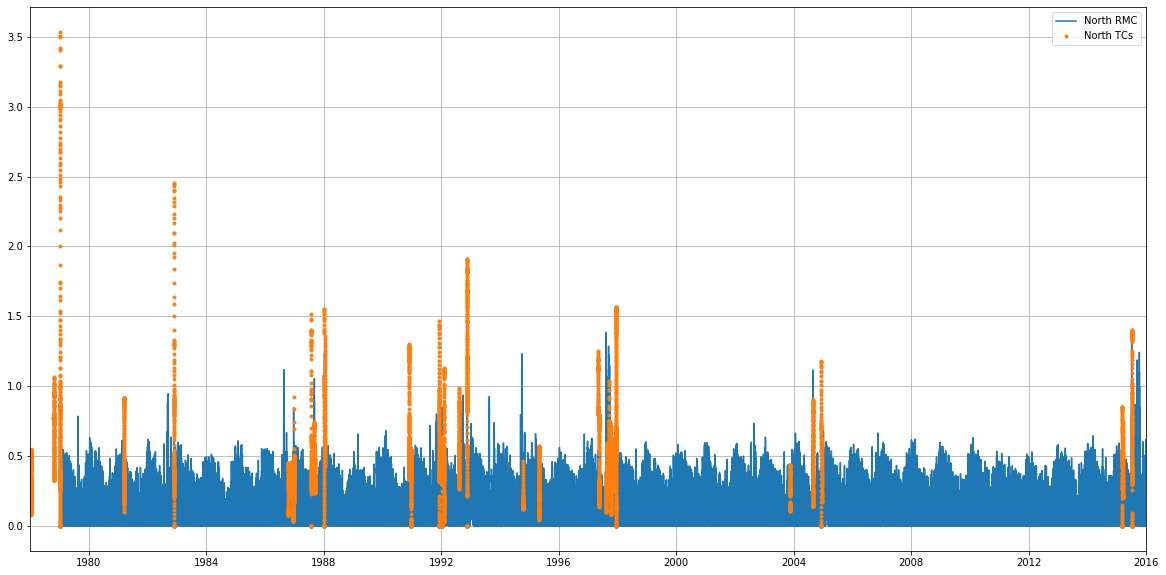

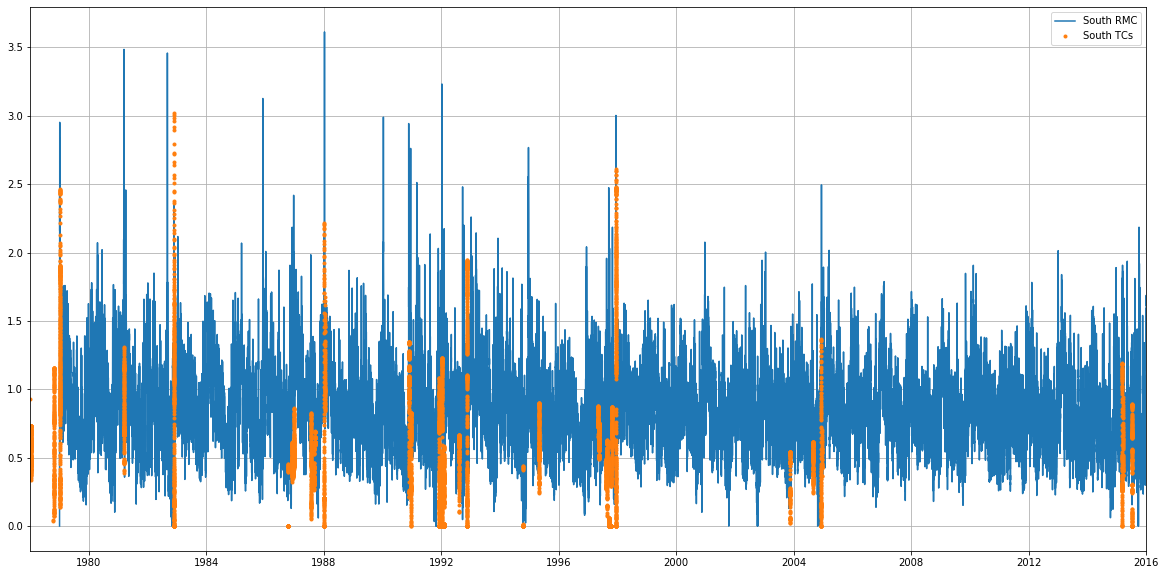

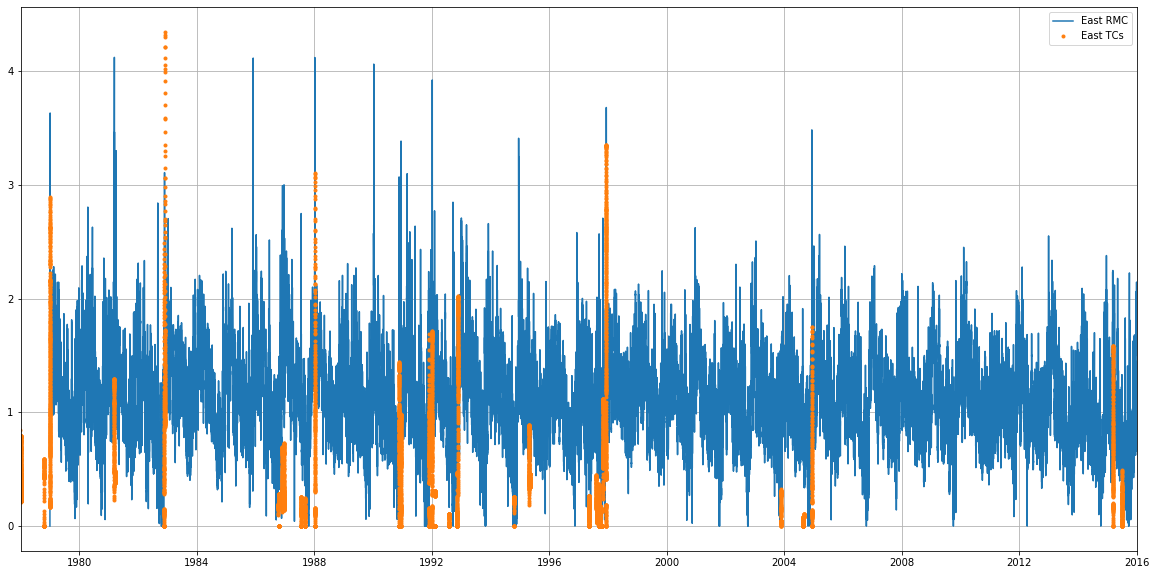

In [3]:
#----------------------------
# Plot all data

plt.figure(figsize=(20,10))
plt.plot(WVS_N.time, WVS_N.hs, label='North RMC')
plt.plot(WVS_TC_N.time, WVS_TC_N.hs, '.', label='North TCs')
plt.grid()
plt.legend()
plt.xlim(datetime(1978,1,1), datetime(2016,1,1))

plt.figure(figsize=(20,10))
plt.plot(WVS_S.time, WVS_S.hs, label='South RMC')
plt.plot(WVS_TC_S.time, WVS_TC_S.hs, '.', label='South TCs')
plt.grid()
plt.legend()
plt.xlim(datetime(1978,1,1), datetime(2016,1,1))

plt.figure(figsize=(20,10))
plt.plot(WVS_E.time, WVS_E.hs, label='East RMC')
plt.plot(WVS_TC_E.time, WVS_TC_E.hs, '.', label='East TCs')
plt.grid()
plt.legend()
plt.xlim(datetime(1978,1,1), datetime(2016,1,1))



(735665.0, 735673.0)

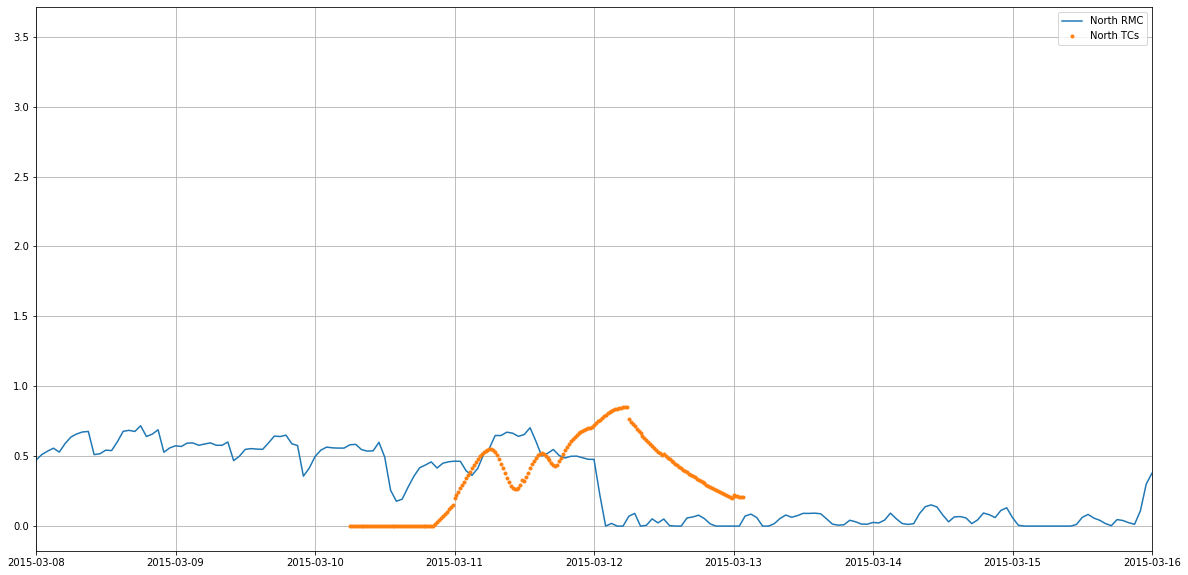

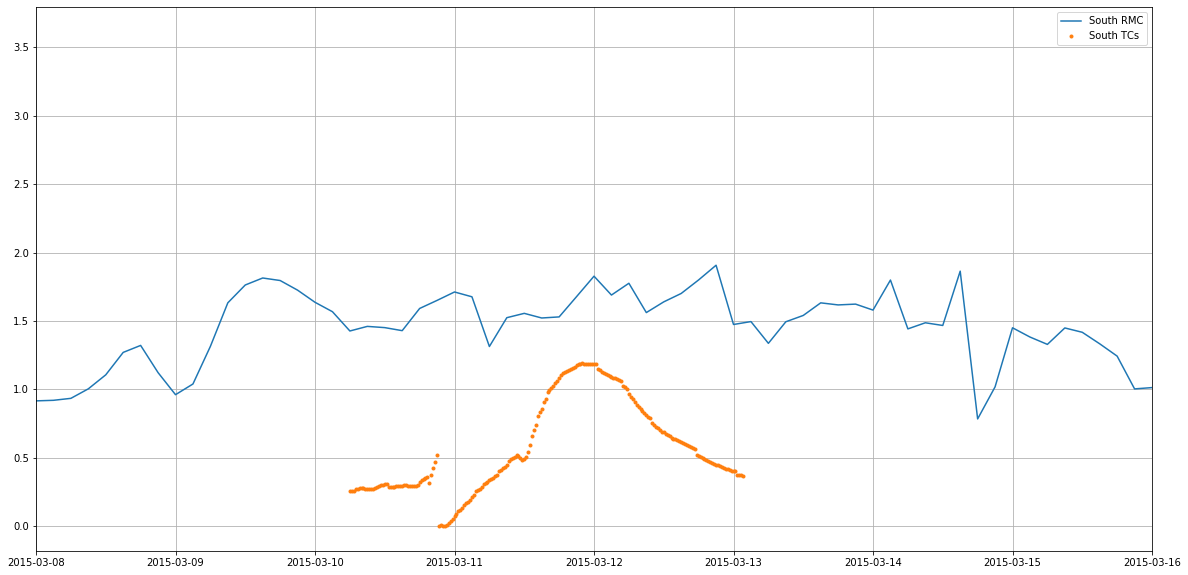

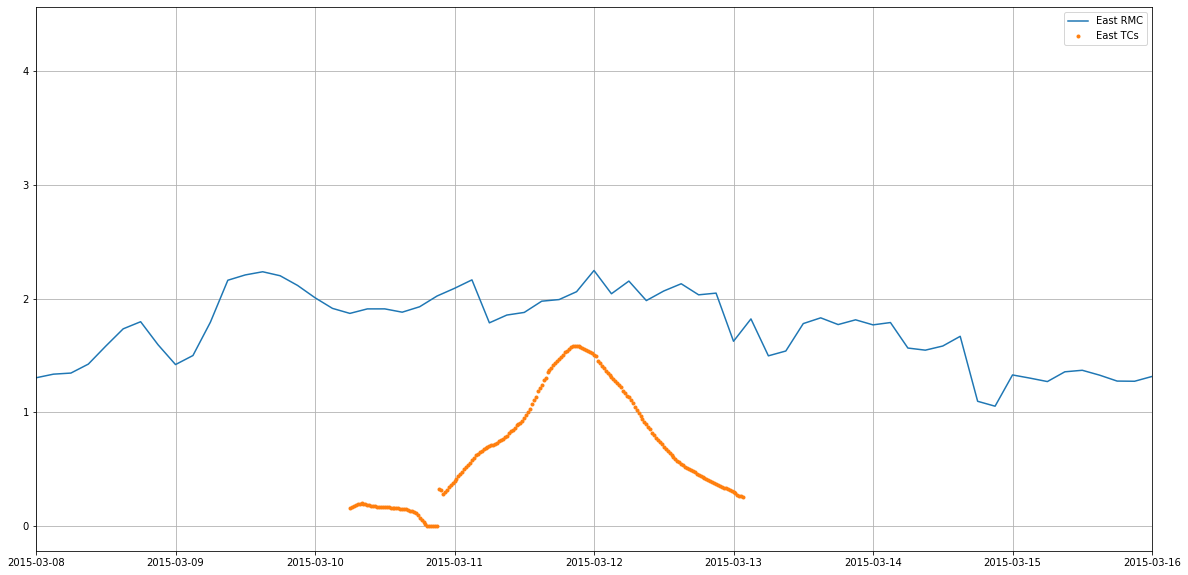

In [7]:
#----------------------------
# Plot zoom TCs

plt.figure(figsize=(20,10))
plt.plot(WVS_N.time, WVS_N.hs, label='North RMC')
plt.plot(WVS_TC_N.time, WVS_TC_N.hs, '.', label='North TCs')
plt.grid()
plt.legend()
#plt.xlim(datetime(1997,11,1), datetime(1998,1,1)) # Paka
#plt.xlim(datetime(1978,12,29), datetime(1979,4,1)) # Alice
#plt.xlim(datetime(1987,12,1), datetime(1988,2,1)) # TC
#plt.xlim(datetime(1982,10,1), datetime(1983,1,2)) # TC
plt.xlim(datetime(2015,3,8), datetime(2015,3,16))  #  TS Bavi 

plt.figure(figsize=(20,10))
plt.plot(WVS_S.time, WVS_S.hs, label='South RMC')
plt.plot(WVS_TC_S.time, WVS_TC_S.hs, '.', label='South TCs')
plt.grid()
plt.legend()
#plt.xlim(datetime(1997,11,1), datetime(1998,1,1)) # Paka
#plt.xlim(datetime(1978,12,29), datetime(1979,4,1)) # Alice
#plt.xlim(datetime(1987,12,1), datetime(1988,2,1)) # TC
#plt.xlim(datetime(1982,10,1), datetime(1983,1,2)) # TC
plt.xlim(datetime(2015,3,8), datetime(2015,3,16))  #  TS Bavi 

plt.figure(figsize=(20,10))
plt.plot(WVS_E.time, WVS_E.hs, label='East RMC')
plt.plot(WVS_TC_E.time, WVS_TC_E.hs, '.', label='East TCs')
plt.grid()
plt.legend()
#plt.xlim(datetime(1997,11,1), datetime(1998,1,1)) # Paka
#plt.xlim(datetime(1978,12,29), datetime(1979,4,1)) # Alice
#plt.xlim(datetime(1987,12,1), datetime(1988,2,1)) # TC
#plt.xlim(datetime(1982,10,1), datetime(1983,1,2)) # TC
plt.xlim(datetime(2015,3,8), datetime(2015,3,16)) #  TS Bavi 

